In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# import scipy as sp
import scipy.signal as sps
import math
import os
import sys
import imutils

pathCustom = ['/Users/pannawis/Projects/01_SmartMeter/SmartPowerMeter_SW/ImageProcessing',
              '/Users/pannawis/Projects/01_SmartMeter/SmartPowerMeter_SW/SignalProcessing']
for ipath in pathCustom:
    if not(ipath in sys.path):
        print(f'Adding path:{ipath}')
        sys.path.append(ipath)

# import wedoimage as wedoimg
# from wedoimage import*
import wedoimage as wedoimg
import wedosignal as wedosig
import pytesseract


Adding path:/Users/pannawis/Projects/01_SmartMeter/SmartPowerMeter_SW/ImageProcessing
Adding path:/Users/pannawis/Projects/01_SmartMeter/SmartPowerMeter_SW/SignalProcessing


(622, 569, 3)


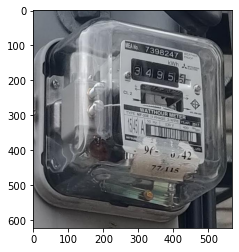

In [2]:
maxIntense = 255

flagRead=1 
# folderImg='/Users/pannawis/Projects/01_SmartMeter/images/BoxMeter_out_resnet'
# folderImg='/Users/pannawis/Projects/01_SmartMeter/images/BoxMeter_resnet_byBrand/Mitsu_5'
folderImg='/Users/pannawis/Projects/01_SmartMeter/SmartPowerMeter_SW/images/BoxMeter/BoxMeter_GoodBad/Mitsu_15A'
# folderSave = '/Users/pannawis/Projects/01_SmartMeter/SmartPowerMeter_SW/images/FrameDigit_mitsu2_ju'
# if not os.path.exists(folderSave):
#     os.makedirs(folderSave)

listImg_abs, listImg_folder, listImg_name = wedoimg.findFile(folderImg,'*.jpg',1)

iImg = 1
pathImg = listImg_abs[iImg]
nameImg=listImg_name[iImg]
# nameImg='2_IMG_20210525_075300.jpg'

myMet=cv2.imread(pathImg,flagRead)
# myMet = cv2.imread('/Users/pannawis/Projects/01_SmartMeter/shapes_and_colors.jpg',flagRead)
# myMet=cv2.imread(r'/Users/pannawis/Projects/01_SmartMeter/images/RealEnviron/IMG_20210518_104256.jpg',flagRead)
print(myMet.shape)
wedoimg.imshowCV(myMet)


[[128 128 128 ... 108 108 111]
 [128 128 127 ... 108 108 109]
 [128 127 127 ... 102 103 103]
 ...
 [150 147 145 ... 113 111 111]
 [150 148 145 ... 114 113 113]
 [151 148 146 ... 115 116 112]]


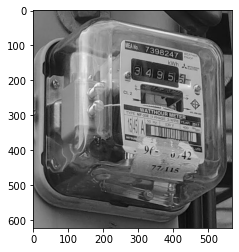

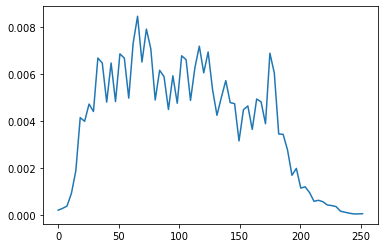

In [3]:
# grey is 1D matric
myMet_grey = cv2.cvtColor(myMet,cv2.COLOR_BGR2GRAY)
width,height = myMet_grey.shape

print(myMet_grey)
wedoimg.imshowCV(myMet_grey)

nbins=70
densityType='pdf'
wedoimg.plotHist(myMet_grey,nbins,densityType)

# Find gradient

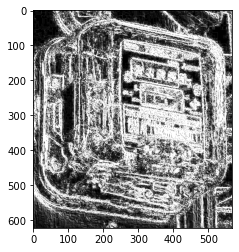

In [4]:
# compute the Scharr gradient magnitude representation of the images
# in both the x and y direction using OpenCV 2.4
ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
gradX = cv2.Sobel(myMet_grey, ddepth=ddepth, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(myMet_grey, ddepth=ddepth, dx=0, dy=1, ksize=-1)

# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

wedoimg.imshowCV(gradient)

# Thresholding

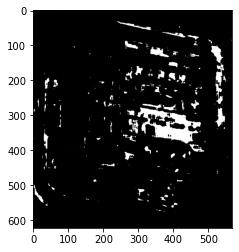

In [5]:
# blur and threshold the image
blurred = cv2.blur(gradient, (9, 9))
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)

wedoimg.imshowCV(thresh)

# Filter erode & dilate

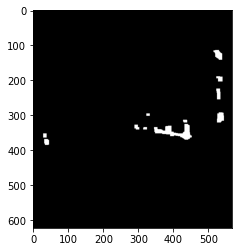

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 30))
erode = cv2.erode(thresh,kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
dil = cv2.dilate(erode,kernel)

wedoimg.imshowCV(dil)